<a href="https://colab.research.google.com/github/MariiaYarmolenko/HW-Data-Loves/blob/main/Copy_of_HW(11.2)_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [29]:
monthly_mean = df['count'].resample('ME').mean()

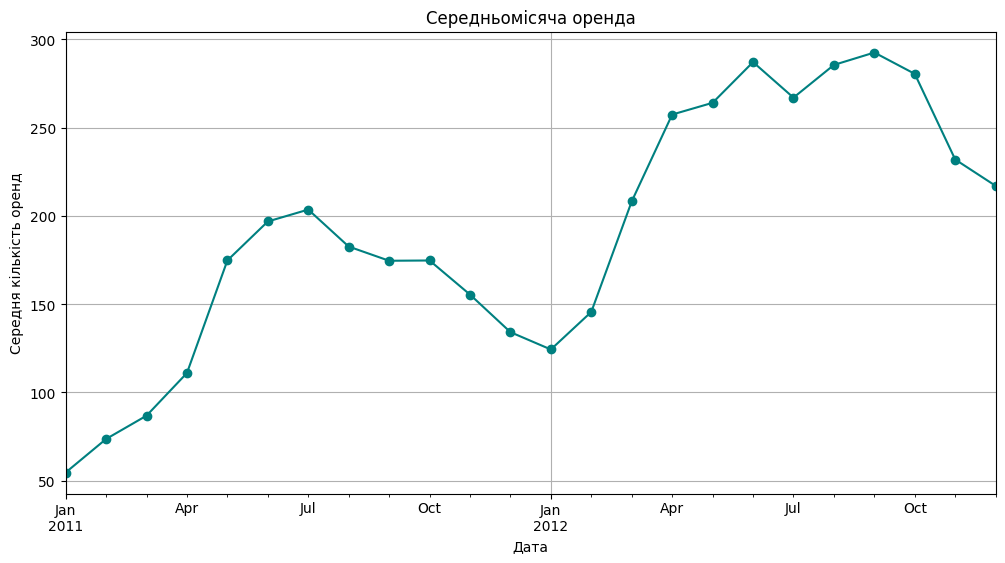

In [30]:
ax = monthly_mean.plot(
    figsize=(12, 6),
    kind='line',
    marker='o',
    color='teal',
    grid=True,
    title='Середньомісяча оренда'
)
ax.set_xlabel('Дата')
ax.set_ylabel('Середня кількість оренд');

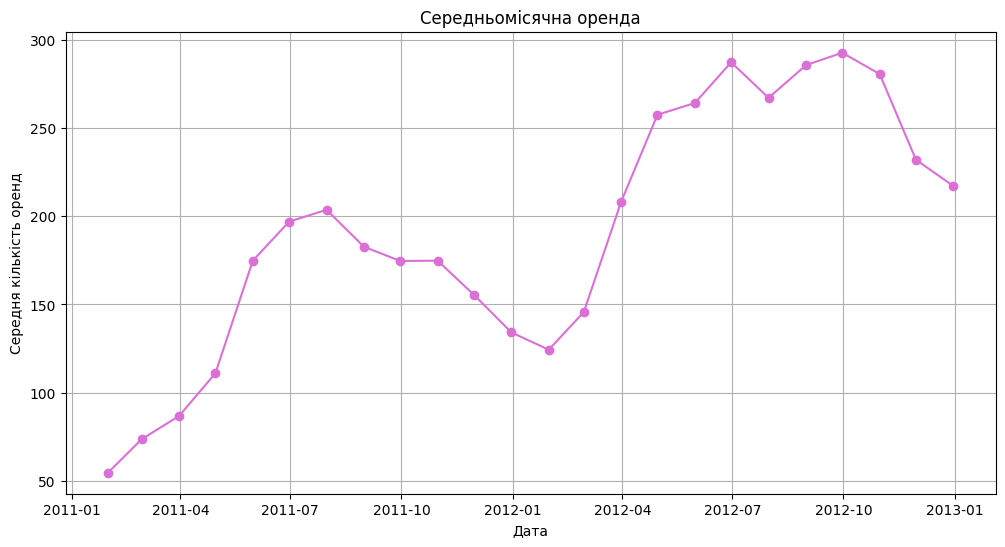

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_mean.index,
    monthly_mean.values,
    marker='o',
    linestyle='-',
    color='orchid'
)
plt.title('Середньомісячна оренда')
plt.xlabel('Дата')
plt.ylabel('Середня кількість оренд')
plt.grid(True)

plt.show()

На графіку, створеному за допомогою Pandas, на осі у дати підписані місяцями, а також наявні major та minor ticks, що пришвидшує його читання, проте сітка містить лише горизонтальну розмітку.

На графіку, створеному за допомогою Matplotlib, на осі у дати підписані у числовому форматі, а також відсутні minor ticks, що ускладнює його читання, проте сітка містить вертикальну та горизонтальну розмітку.

На мою думку, графік, створений за допомогою Pandas, легше "читається".

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [32]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

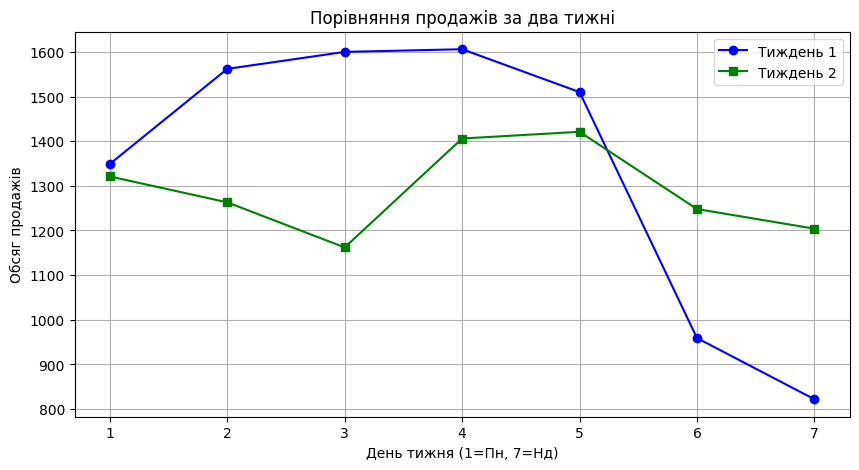

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='blue')
plt.plot(days, sales_week2, marker='s', label='Тиждень 2', color='green')

plt.title('Порівняння продажів за два тижні')
plt.xlabel('День тижня (1=Пн, 7=Нд)')
plt.ylabel('Обсяг продажів')
plt.xticks(days)
plt.legend()
plt.grid(True)

plt.show()

1. Продажі були більш стабільними у другий тиждень, так як на графіку лінія, що демонструє продажі за другий тиждень, має менше різких коливань, порівняно з першим тижнем.

2.  Найкращим способом підкріпити ці висновки є розрахунок стандартного відхилення $\sigma$.

In [34]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення (Тиждень 1): {std_week1:.2f}")
print(f"Стандартне відхилення (Тиждень 2): {std_week2:.2f}")

Стандартне відхилення (Тиждень 1): 300.00
Стандартне відхилення (Тиждень 2): 90.91


Стандартне відхилення у даних за перший тиждень значно перевищує стандартне відхилення даних за другий, що підтверджує попередні висновки.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

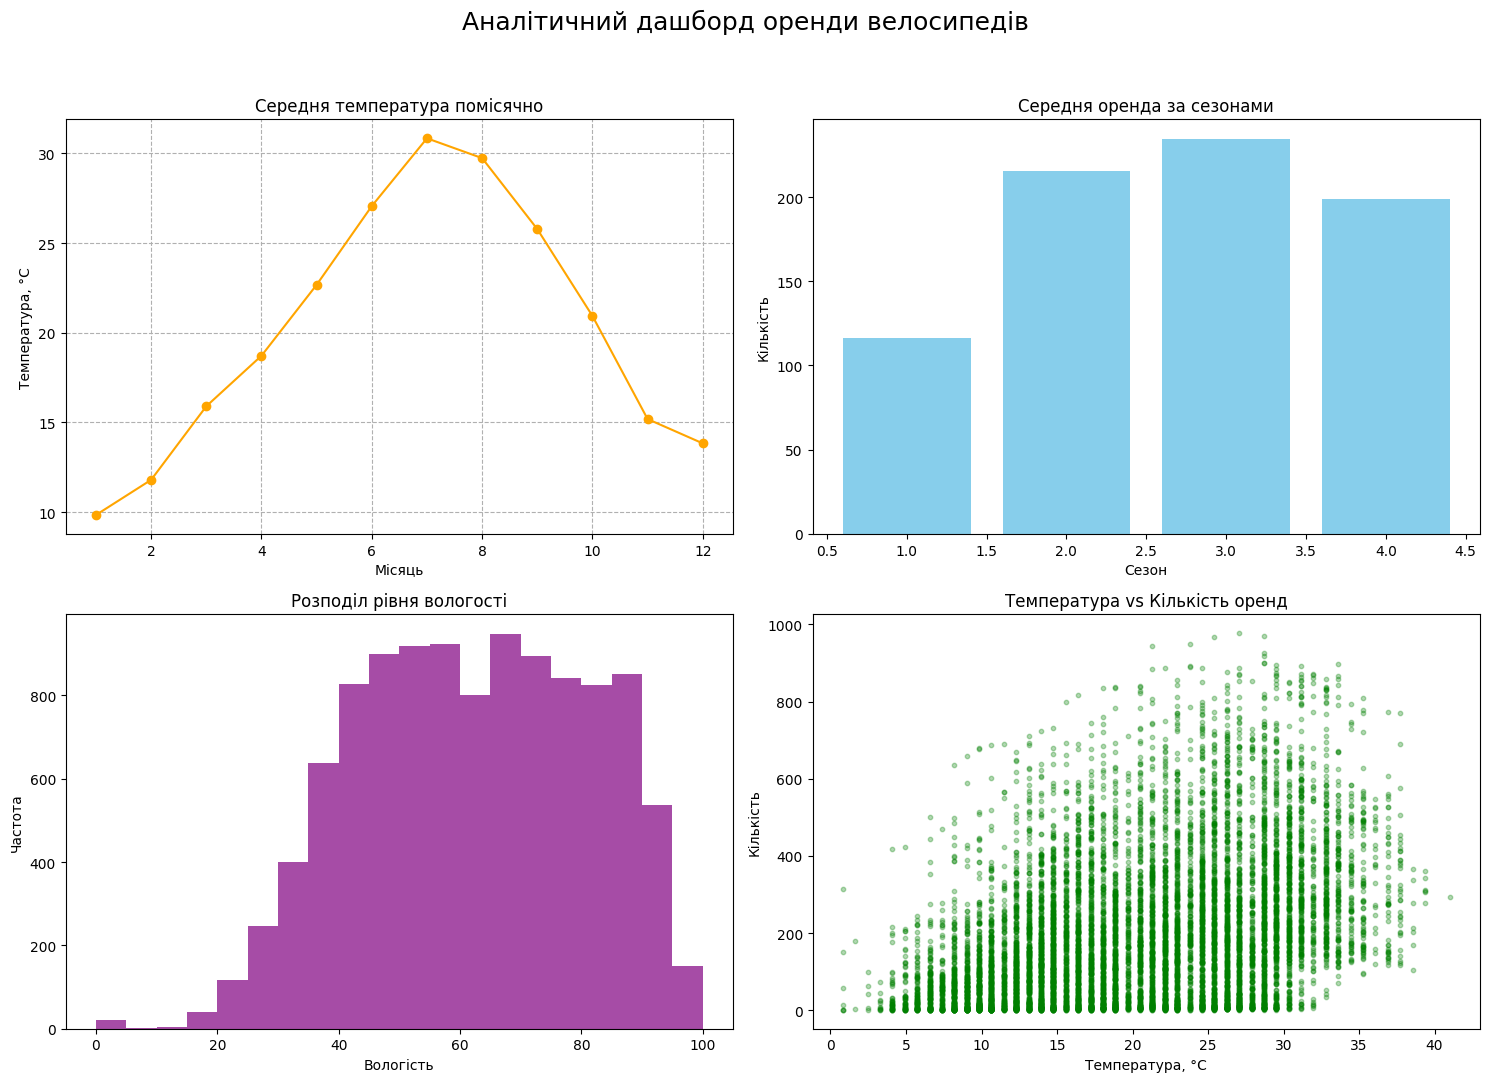

In [35]:
monthly_temp = df.groupby('month')['temp'].mean()
quarterly_rent = df.groupby('season')['count'].mean()

plt.figure(figsize=(15, 11))

plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='orange')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура, °C')
plt.grid(True, linestyle='--')

plt.subplot(2, 2, 2)
plt.bar(quarterly_rent.index, quarterly_rent.values, color='skyblue')
plt.title('Середня оренда за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість')

plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='purple', alpha=0.7)
plt.title('Розподіл рівня вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.3, s=10, color='green')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура, °C')
plt.ylabel('Кількість')

plt.suptitle('Аналітичний дашборд оренди велосипедів', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

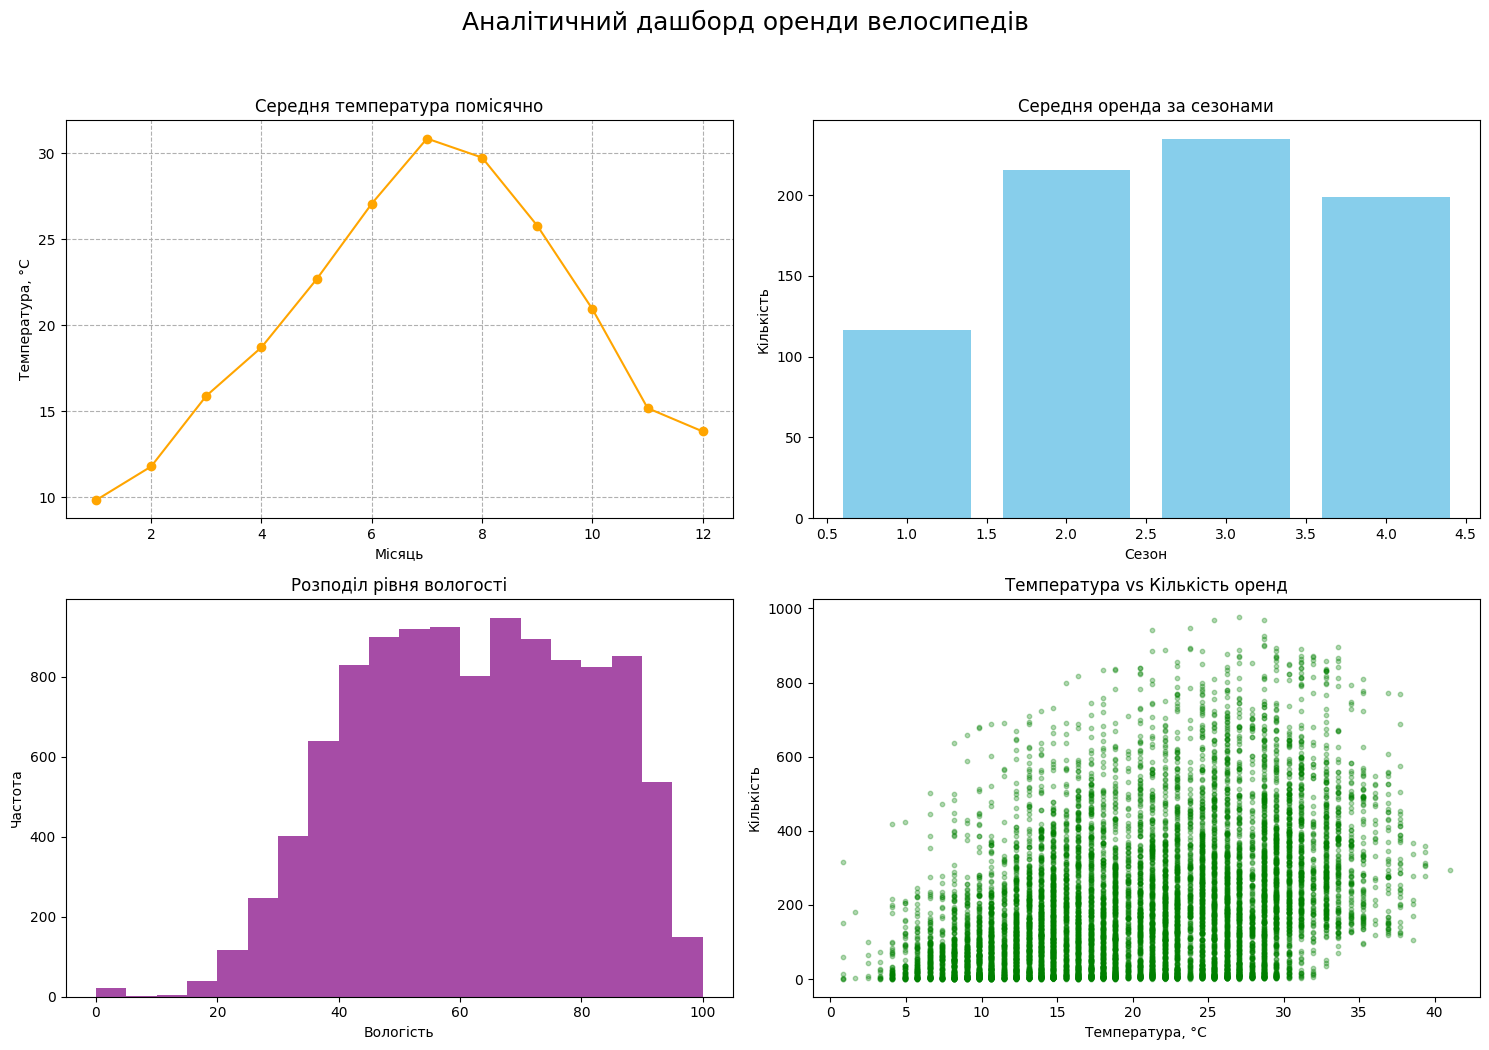

In [36]:
monthly_temp = df.groupby('month')['temp'].mean()
quarterly_rent = df.groupby('season')['count'].mean()

fig, axes = plt.subplots(2, 2, figsize=(15, 11))
fig.suptitle('Аналітичний дашборд оренди велосипедів', fontsize=18)

axes[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='orange')
axes[0, 0].set_title('Середня температура помісячно')
axes[0, 0].set_xlabel('Місяць')
axes[0, 0].set_ylabel('Температура, °C')
axes[0, 0].grid(True, linestyle='--')

axes[0, 1].bar(quarterly_rent.index, quarterly_rent.values, color='skyblue')
axes[0, 1].set_title('Середня оренда за сезонами')
axes[0, 1].set_xlabel('Сезон')
axes[0, 1].set_ylabel('Кількість')

axes[1, 0].hist(df['humidity'], bins=20, color='purple', alpha=0.7)
axes[1, 0].set_title('Розподіл рівня вологості')
axes[1, 0].set_xlabel('Вологість')
axes[1, 0].set_ylabel('Частота')

axes[1, 1].scatter(df['temp'], df['count'], alpha=0.3, s=10, color='green')
axes[1, 1].set_title('Температура vs Кількість оренд')
axes[1, 1].set_xlabel('Температура, °C')
axes[1, 1].set_ylabel('Кількість')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [37]:
##plt.subplots() - більш сучасний підхід, який дозволяє "звертатись" до кожного графіку окремо, змінювати налаштування,
#використовуючи індекси матриці, в яких легко орієнтуватись.

##plt.subplot() - при внесенні змін, ми змушені кожного разу звертатись до глобального стану plt і наново викликати plt.subplot(),
#а також, за наявності великої кількості графіків, маємо пам'ятати конкретний індекс кожного з них.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

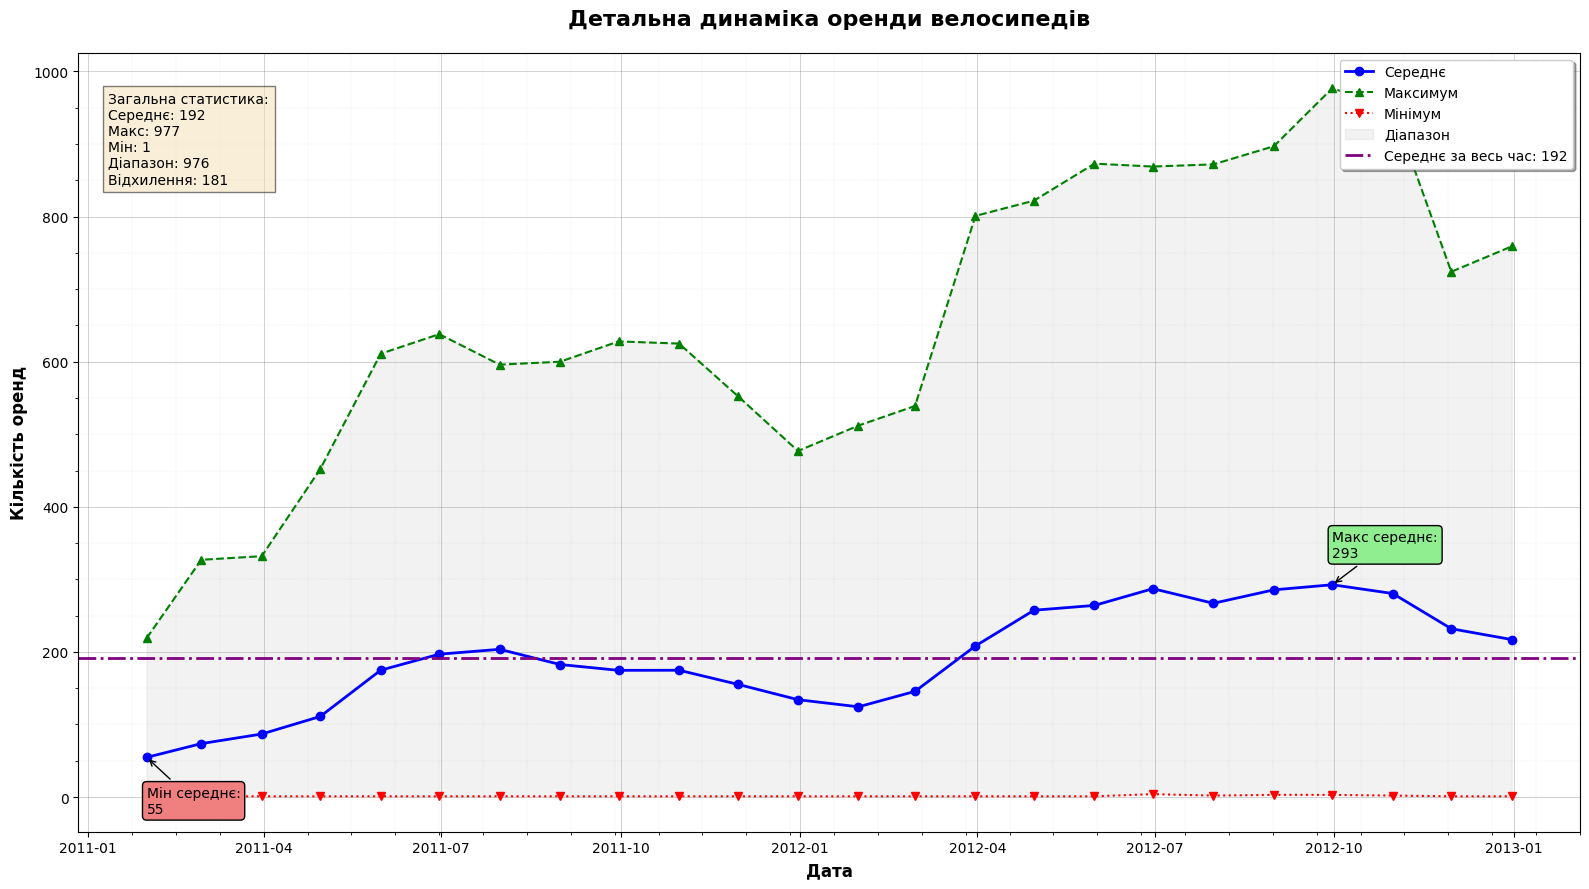

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

monthly_stats = df.resample('ME')['count'].agg(['mean', 'max', 'min'])
monthly_stats = monthly_stats.replace(0, np.nan).dropna()

overall_mean = df['count'].mean()
overall_max = df['count'].max()
overall_min = df['count'].min()
overall_range = overall_max - overall_min
overall_std = df['count'].std()

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(monthly_stats.index, monthly_stats['mean'], marker='o', linestyle='-', color='blue', linewidth=2, label='Середнє')
ax.plot(monthly_stats.index, monthly_stats['max'], marker='^', linestyle='--', color='green', linewidth=1.5, label='Максимум')
ax.plot(monthly_stats.index, monthly_stats['min'], marker='v', linestyle=':', color='red', linewidth=1.5, label='Мінімум')

ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], color='gray', alpha=0.1, label='Діапазон')
ax.axhline(overall_mean, color='purple', linestyle='-.', linewidth=2, label=f'Середнє за весь час: {overall_mean:.0f}')

max_idx = monthly_stats['mean'].idxmax()
min_idx = monthly_stats['mean'].idxmin()

ax.annotate(f'Макс середнє:\n{monthly_stats["mean"].max():.0f}', xy=(max_idx, monthly_stats["mean"].max()),
            xytext=(0, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='round', fc='lightgreen'))

ax.annotate(f'Мін середнє:\n{monthly_stats["mean"].min():.0f}', xy=(min_idx, monthly_stats["mean"].min()),
            xytext=(0, -40), textcoords='offset points', arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='round', fc='lightcoral'))

ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.3)

ax.legend(loc='upper right', shadow=True, fontsize=10)
stats_text = (f"Загальна статистика:\nСереднє: {overall_mean:.0f}\nМакс: {overall_max}\n"
              f"Мін: {overall_min}\nДіапазон: {overall_range}\nВідхилення: {overall_std:.0f}")
ax.text(0.02, 0.95, stats_text, transform=ax.transAxes, bbox=dict(facecolor='wheat', alpha=0.5), verticalalignment='top')

ax.set_title('Детальна динаміка оренди велосипедів', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

1. Перевага додавання анотацій полягає в швидкому "читанні" графіка, фокусуванні уваги на важливих моментах, а також прибирає потребу бігати очима по всій фігурі для пошуку підказок.

2. fill_between() використовується для зафарбовування (заливки) певного сектору на графіку, в даному випадку - діапазон значень між мінімумом та максимумом за певний місяць, що дозволяє інтуїтивно оцінити розкид значень.

3. Текстовий блок допомагає зробити швидку оцінку показників, без потреби копатися у звіті, а також вказує на оцінку наявних даних, а не лише візуалізаію "сирих".